## Question 1: Preprocessing (20 points)

In [1]:
import pandas as pd
import numpy as np

### Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [2]:
# your code
df = pd.read_csv("./datasets/ski_resorts.csv", index_col=0)

#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [3]:
# your code
print(df.dtypes)
df.head()

Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object


,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,75398.0,600.0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,99017.0,1032.0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,1932.0,0.0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,32938.0,163.0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,49228.0,450.0


**Your Answer:** On the first sight there are no data type problems.

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [4]:
# your code
df['Country'] = df['Country'].astype('category')
print(df.dtypes)

Resort                 object
Country              category
HighestPoint          float64
LowestPoint           float64
DayPassPriceAdult     float64
BeginnerSlope         float64
IntermediateSlope       int64
DifficultSlope        float64
TotalSlope              int64
Snowparks              object
NightSki               object
SurfaceLifts          float64
ChairLifts              int64
GondolaLifts          float64
TotalLifts              int64
LiftCapacity          float64
SnowCannons           float64
dtype: object


**Your Answer:** As there is only a limited amount of different countries contained in the dataset, the column countries could be converted into a catogorical column. Furthermore one could also transform the features SnowParks and NightSki into categorical datatypes. But as we are later instructed to transform these features into the datatype bool, we leave the datatype unchanged here.

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [5]:
# your code for 1. How many entries does the dataframe have? (To relate this to the number of entries missing)
print("Number of entries: ", df.shape[0] * df.shape[1])
entries = df.shape[0] * df.shape[1]

Number of entries:  6392


In [6]:
# your code for 2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
na_count = df.isnull().sum().sum()
print('There are {} missing values'.format(na_count))
print('Ratio: ', na_count/entries)

There are 87 missing values
Ratio:  0.013610763454317897


In [7]:
# your code for 3. How many rows have at least a single missing value?
rows = df.isna().any(axis=1).sum()
print("{} rows contain at least one missing value".format(rows))

45 rows contain at least one missing value


In [8]:
# your code for 4. Count the number of missing values per column.
df_columns = df.isna().sum()
print(df_columns)

Resort                0
Country               0
HighestPoint         13
LowestPoint           3
DayPassPriceAdult    17
BeginnerSlope         8
IntermediateSlope     0
DifficultSlope        8
TotalSlope            0
Snowparks             0
NightSki              0
SurfaceLifts          6
ChairLifts            0
GondolaLifts          7
TotalLifts            0
LiftCapacity         17
SnowCannons           8
dtype: int64


In [9]:
# your code for 5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
df2 = df.copy()
df2["missing value count"] = df.isna().sum(axis=1)
df2.head()
#print(df2[df2["missing value count"]==1])
rows_with_missing_value= df2[df2["missing value count"]==1]
rows_with_missing_value.head()
print("Number of missing values per row: ", df.isna().sum(axis=1).value_counts())

Number of missing values per row:  0    331
1     35
6      8
2      2
Name: count, dtype: int64


**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)*\
There are eight entries which are missing six values each and there are also six columns which have eight or greater values missing. It may be possible that there are no slopes in these regions.

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [10]:
# your code for 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
df=pd.get_dummies(df, columns=['Country'])

In [11]:
df.head()

,Resort,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,...,Country_Serbia,Country_Siberia,Country_Slovakia,Country_Slovenia,Country_Southern Russia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom
1,Alpendorf (Ski amedé),1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,...,False,False,False,False,False,False,False,False,False,False
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,...,False,False,False,False,False,False,False,False,False,False
3,Oberau (Wildschönau),1130.0,900.0,30.0,1.0,0,1.0,2,No,No,...,False,False,False,False,False,False,False,False,False,False
4,Dachstein West,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,...,False,False,False,False,False,False,False,False,False,False
5,Rosa Khutor,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,...,False,False,False,False,True,False,False,False,False,False


In [12]:
# your code for 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`
df["Snowparks"] = df["Snowparks"].map({'Yes': True, 'No' : False},  na_action = 'ignore')
df["Snowparks"] = df["Snowparks"].astype(bool)
df['NightSki'] = df["NightSki"].map({'Yes': True, 'No' : False}, na_action = 'ignore' )
df["NightSki"] = df["NightSki"].astype(bool)

In [13]:
# use df.dtypes to check if you correctly transform the data
df.dtypes

Resort                             object
HighestPoint                      float64
LowestPoint                       float64
DayPassPriceAdult                 float64
BeginnerSlope                     float64
IntermediateSlope                   int64
DifficultSlope                    float64
TotalSlope                          int64
Snowparks                            bool
NightSki                             bool
SurfaceLifts                      float64
ChairLifts                          int64
GondolaLifts                      float64
TotalLifts                          int64
LiftCapacity                      float64
SnowCannons                       float64
Country_Andorra                      bool
Country_Austria                      bool
Country_Bosnia and Herzegovina       bool
Country_Bulgaria                     bool
Country_Czech Republic               bool
Country_Denmark                      bool
Country_Finland                      bool
Country_France                    

#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)*
From the description of the features we know that $TotalLifts = SurfaceLifts + GondolaLifts + ChairLifts$. Therefor we can impute the values for the missing values in the 'SurfaceLifts' and 'GondalaLifts' as long as we know the numbers for the other features in the above equation. This is
the case for out dataset, thus we can impute the values in this way.

In [14]:
# your code
# checking if there are rows where SurfaceLifts and GondolaLifts are missing at the same time.
# ChairLifts and TotalLifts do not need to be checked as these features are always present.
print(df[df['SurfaceLifts'].isna() | df['GondolaLifts'].isna() ][['SurfaceLifts', 'GondolaLifts']])

#After checking we can safely inpute the values using our idea described above.
df['SurfaceLifts'] = df['SurfaceLifts'].fillna(df['TotalLifts'] - df['ChairLifts'] - df['GondolaLifts'])

df['GondolaLifts'] = df['GondolaLifts'].fillna(df['TotalLifts'] - df['ChairLifts'] - df['SurfaceLifts'])

     SurfaceLifts  GondolaLifts
23            NaN           4.0
50            NaN           0.0
105           2.0           NaN
119           NaN           2.0
126          11.0           NaN
189           5.0           NaN
201           8.0           NaN
204           NaN           0.0
208           3.0           NaN
250           3.0           NaN
275           NaN           8.0
298           8.0           NaN
372           NaN           7.0


#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [15]:
# your code for step 1 & 2
df_temp = df.copy()
df_temp = df_temp._get_numeric_data()
droped_columns = df_temp.select_dtypes(include=['uint8', 'bool', 'object'])
df_temp = df_temp.select_dtypes(exclude=['uint8', 'bool', 'object'])
feature_names = df_temp.keys()
df_temp.head()


,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,1980.0,740.0,52.0,30.0,81,4.0,115,22.0,16,11.0,49,75398.0,600.0
2,2640.0,1710.0,47.0,100.0,77,33.0,210,37.0,28,7.0,72,99017.0,1032.0
3,1130.0,900.0,30.0,1.0,0,1.0,2,2.0,0,0.0,2,1932.0,0.0
4,1620.0,780.0,42.0,15.0,33,3.0,51,25.0,8,3.0,36,32938.0,163.0
5,2320.0,940.0,22.0,30.0,26,21.0,77,6.0,11,10.0,27,49228.0,450.0


In [16]:
# your code for step 3
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_temp_scaled = scaler.fit_transform(df_temp)
print(df_temp_scaled)

[[0.49192481 0.33944954 0.64197531 ... 0.2816092  0.29886634 0.25178347]
 [0.66666667 0.78440367 0.58024691 ... 0.4137931  0.3924885  0.43306756]
 [0.26687847 0.41284404 0.37037037 ... 0.01149425 0.00765816 0.        ]
 ...
 [0.83478952 0.5559633  0.5308642  ... 0.17241379 0.12677977 0.27486362]
 [0.83478952 0.5559633  0.5308642  ... 0.17241379 0.12677977 0.27486362]
 [0.54699497 0.4587156  0.64197531 ... 0.1091954  0.10301253 0.04741922]]


In [17]:
# your code for step 4
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
imputed_df = imputer.fit_transform(df_temp_scaled)
print(imputed_df)

[[0.49192481 0.33944954 0.64197531 ... 0.2816092  0.29886634 0.25178347]
 [0.66666667 0.78440367 0.58024691 ... 0.4137931  0.3924885  0.43306756]
 [0.26687847 0.41284404 0.37037037 ... 0.01149425 0.00765816 0.        ]
 ...
 [0.83478952 0.5559633  0.5308642  ... 0.17241379 0.12677977 0.27486362]
 [0.83478952 0.5559633  0.5308642  ... 0.17241379 0.12677977 0.27486362]
 [0.54699497 0.4587156  0.64197531 ... 0.1091954  0.10301253 0.04741922]]


In [18]:
# your code for step 5
reverse = scaler.inverse_transform(imputed_df)
df_restored = pd.DataFrame(reverse)
df_restored.index = np.arange(1, len(df) + 1)

df_restored.columns = feature_names

In [19]:
# your code for step 6
df = pd.concat([df_restored, droped_columns], axis=1)
df.head()

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,...,Country_Serbia,Country_Siberia,Country_Slovakia,Country_Slovenia,Country_Southern Russia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom
1,1980.0,740.0,52.0,30.0,81.0,4.0,115.0,22.0,16.0,11.0,...,False,False,False,False,False,False,False,False,False,False
2,2640.0,1710.0,47.0,100.0,77.0,33.0,210.0,37.0,28.0,7.0,...,False,False,False,False,False,False,False,False,False,False
3,1130.0,900.0,30.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1620.0,780.0,42.0,15.0,33.0,3.0,51.0,25.0,8.0,3.0,...,False,False,False,False,False,False,False,False,False,False
5,2320.0,940.0,22.0,30.0,26.0,21.0,77.0,6.0,11.0,10.0,...,False,False,False,False,True,False,False,False,False,False


In [20]:
assert df.isna().sum().sum() == 0

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [21]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_v = pd.read_csv("./datasets/ski_resorts_visual.csv", index_col=0)
df_v.head()

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


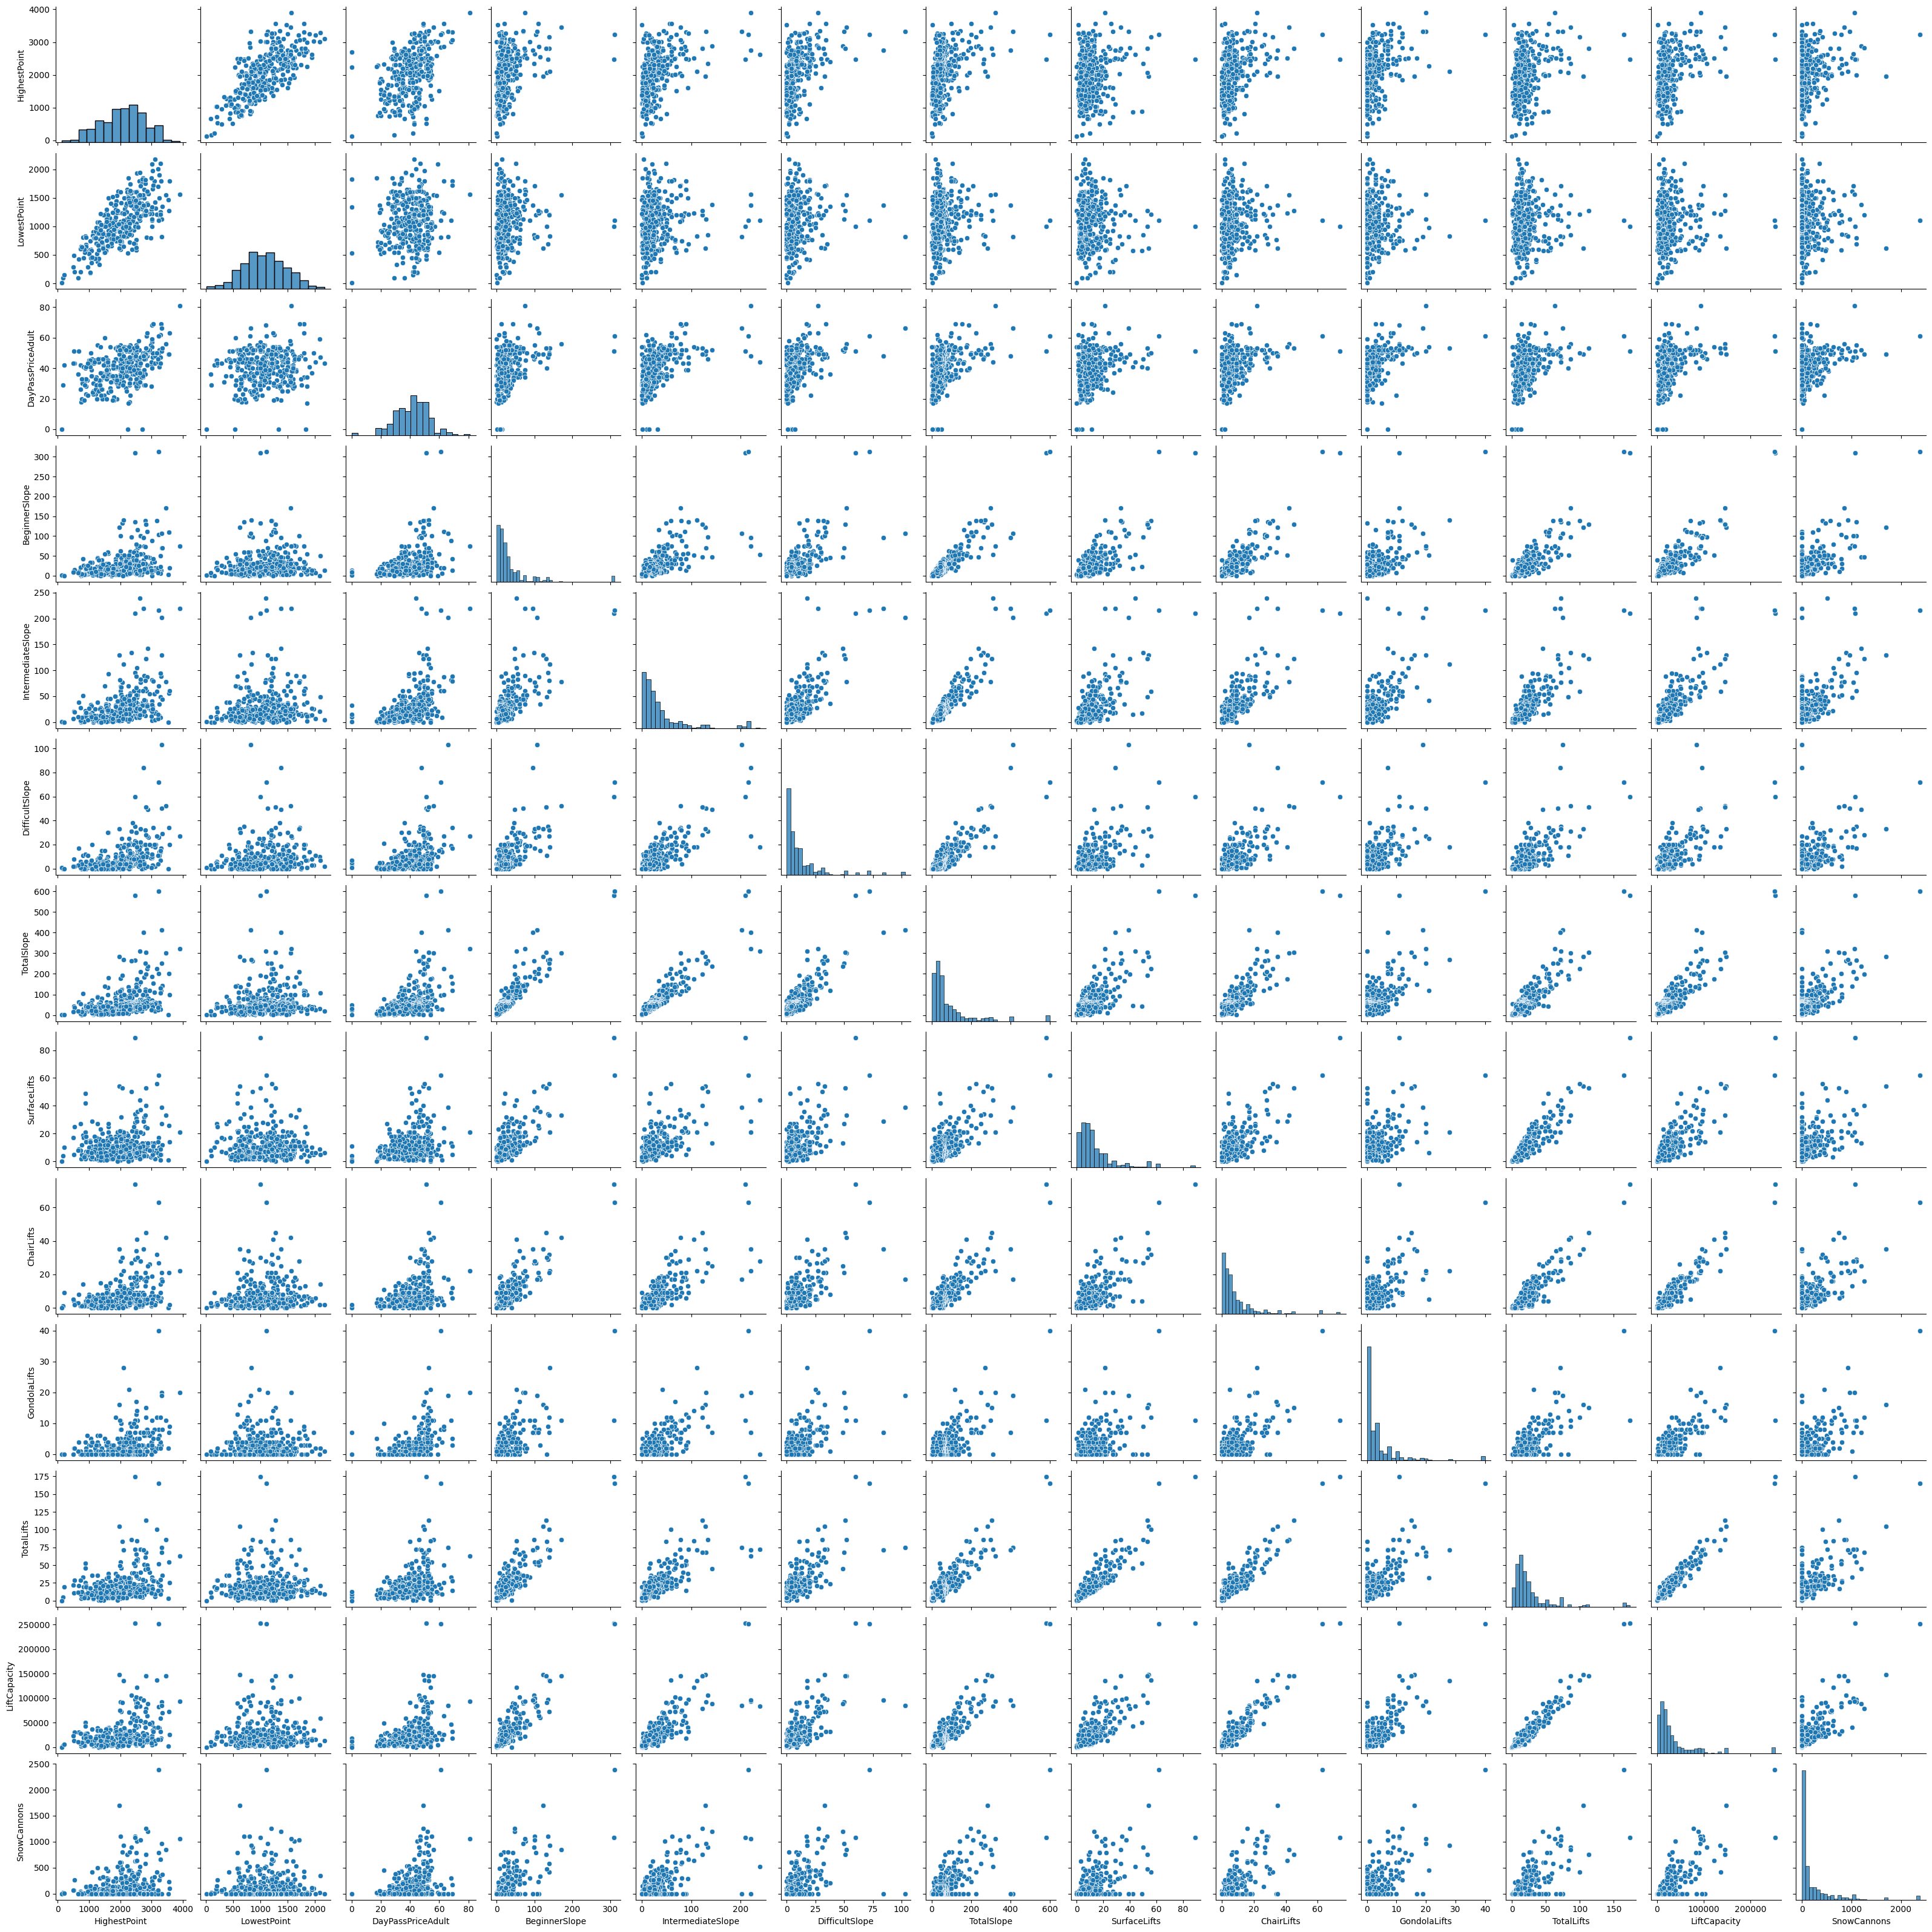

In [23]:
# your code
sns.pairplot(df_v._get_numeric_data())

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

<Axes: >

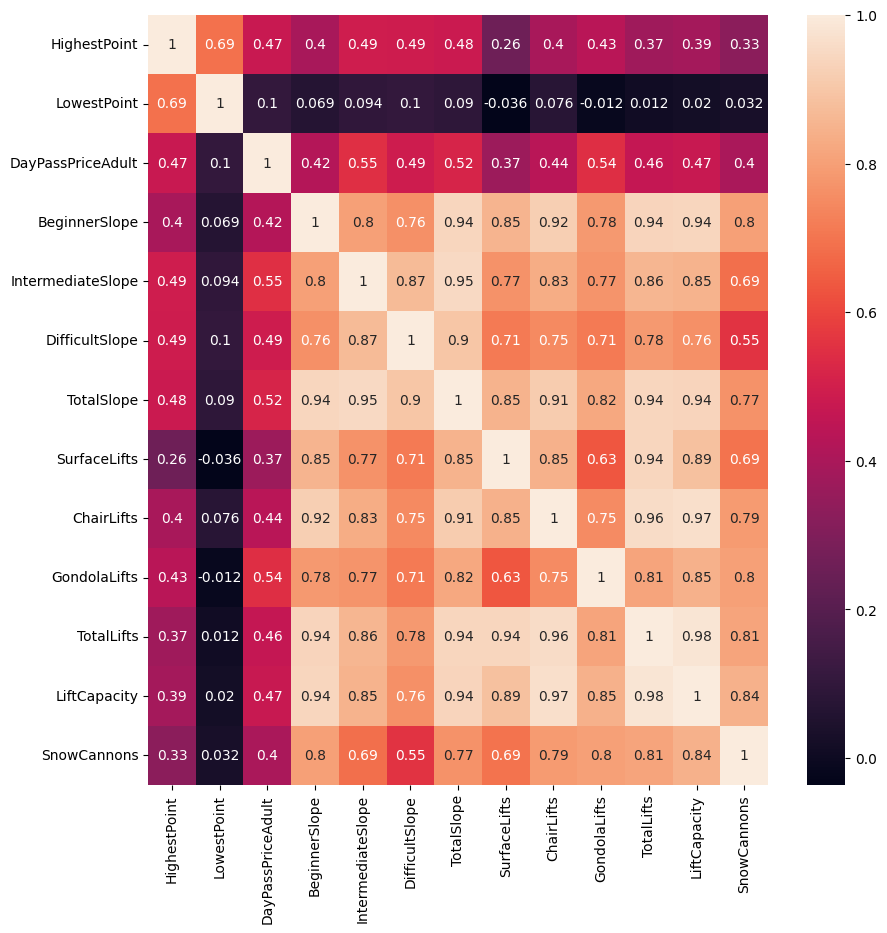

In [24]:
# your code
df_numeric = pd.DataFrame(df_v._get_numeric_data())
plt.figure(figsize=(10,10))
sns.heatmap(df_numeric.corr(), annot = True)

From the scatter plots and the Heatmap, we can identify several features that correlate. The highest point of a Ski Resort strongly correlates with the lowest point of a Ski resort. Furthermore, we observe correlations between these attributes that depend on the size of a Ski Resort. Bigger Ski resorts tend to have more Lifts, Slopes, and Snow Cannons. Thus the features that count the number of slopes or the number of lifts, the total capacity of the lifts, or the number of Snow Cannons highly correlates. Other correlations can not be observed from the plots. 

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

In [25]:
# your code
px.treemap(df_v, path = [px.Constant('Europe'), 'Country', 'Resort'], values='TotalSlope')

**Your answer for...** \
*...  1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:* \
  - France 12546
  - Austria 7005
  - Switzerland 5710
  - Italy 3742
  - Andorra 723

*...  2. The max value of TotalSlope of the five countries you identified in 1:*
- France 600
- Austria 304
- Switzerland 412
- Italy 400
- Andorra 210

### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

In [26]:
# your code
px.sunburst(df_v, path = ['Country', 'Snowparks', 'Resort'], values='TotalLifts')

**Your answer:**\
 From the first level of the hierarchy, we can observe that most of the lifts are located in France followed by Austria, Switzerland, and Italy. The second and third level of hierarchy shows us that Ski Resorts that have a Snowpark are often bigger than those Ski Resorts that do not have a Snowpark. However, there are also two bigger Ski Resorts in Italy that do not have a Snowpark. We can also observe that a lot of small Ski-Resorts have a Snowpark. Thus we can conclude that if a Ski Resort does not have a Snowpark it is likely that it is also a Ski Resort that only has a small number of lifts.

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [27]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [28]:
# your code
retail_df = df = pd.read_csv("./datasets/retail.csv")
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,178500,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,178500,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,178500,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,178500,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,178500,United Kingdom


#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [29]:
# your code
print('Number of rows: ', retail_df.shape[0])
print('Number of unique customers: ' ,retail_df['CustomerID'].nunique())
print('Number of unique product names: ', retail_df['Description'].nunique())
print('Number of unique invoices: ', retail_df['Invoice'].nunique())
print("Number of countries", retail_df["Country"].nunique())
grouped = retail_df.groupby('Country', as_index=False).first()
print(retail_df.groupby('Country')['CustomerID'].nunique())

Number of rows:  406525
Number of unique customers:  4367
Number of unique product names:  3896
Number of unique invoices:  22177
Number of countries 35
Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
Finland                   12
France                    87
Germany                   95
Greece                     4
Iceland                    1
Israel                     4
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  

#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [30]:
# your code
# Drop NAN entries
retail_df.dropna(inplace=True)
retail_df['Description'] =  retail_df['Description'].str.strip()
#test = retail_df[retail_df['Invoice'].str.match('^C.*') == True]
retail_df.drop(retail_df[retail_df['Invoice'].str.match('^C.*') == True].index, inplace=True)

#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [31]:
# your code
print('Number of rows: ', retail_df.shape[0])
print('Number of unique customers: ', retail_df['CustomerID'].nunique())
print('Number of unique product names: ', retail_df['Description'].nunique())
print('Number of unique invoices: ', retail_df['Invoice'].nunique())
print("Number of countries", retail_df["Country"].nunique())
print(retail_df.groupby('Country')['CustomerID'].nunique())

Number of rows:  397621
Number of unique customers:  4334
Number of unique product names:  3866
Number of unique invoices:  18524
Number of countries 35
Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
Finland                   12
France                    87
Germany                   94
Greece                     4
Iceland                    1
Israel                     3
Italy                     14
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  

**Your answer:**  The number of unique customers, the number of unique product names, and the number of unique invoices have changed.

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [32]:
# your code
transaction_df = pd.DataFrame(retail_df.groupby('Invoice')['Description'].apply(lambda s: s.unique()))
transaction_df.head()

,Description
Invoice,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
536369,[BATH BUILDING BLOCK WORD]


In [33]:
print("the dataset has {} rows".format(transaction_df.shape[0]))

the dataset has 18524 rows


**Your answer:**The new dataframe contains only 18524 entries.

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [34]:
# your code
transaction_data = transaction_df['Description'].tolist() 
te = TransactionEncoder()
boolean_matrix = te.fit_transform(transaction_data)
boolean_df = pd.DataFrame(boolean_matrix, columns=te.columns_)
boolean_df.shape

(18524, 3866)

#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [35]:
# your code
frequent_itemset = apriori(boolean_df, min_support=0.01, use_colnames=True)
frequent_itemset_3 = frequent_itemset[frequent_itemset['itemsets'].apply(lambda x: len(x) >= 3)]
frequent_itemset_3

,support,itemsets
919,0.011607,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK..."
920,0.014414,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI..."
921,0.014630,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
922,0.021054,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."
923,0.016843,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
924,0.012524,"(JUMBO BAG STRAWBERRY, JUMBO BAG PINK POLKADOT..."
925,0.010149,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
926,0.011876,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKAD..."
927,0.010095,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR..."
928,0.010095,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS..."


In [36]:
print(boolean_df.shape[0])

18524


**Your answer:**
Items with a support of 0.01 have a support count of at least 186 as the total dateset contains 18524 entries.

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [39]:
# your code
assoc_rules_conf_06 = arule(frequent_itemset, metric='confidence', min_threshold = 0.6)
assoc_rules_conf_06

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [176]:
assoc_rules_conf_09 = arule(frequent_itemset, metric='confidence', min_threshold = 0.9)
assoc_rules_conf_09

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.012092,0.014576,0.010905,0.901786,61.869180,0.010729,10.033411
1,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...",(POPPY'S PLAYHOUSE KITCHEN),0.011067,0.018678,0.010041,0.907317,48.575553,0.009834,10.587943
2,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.014306,0.037303,0.012902,0.901887,24.177353,0.012369,9.812104


**Your answer:** If we set the threshold to 0.6 we obtain 142 different association rules. If we set the theshold to 0.9 we only obtain 3 different association rules. Thus a higher treshhold seems to result in a fewer number of association rules.

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [177]:
# your code
print(assoc_rules_conf_06.sort_values(by = ['lift'], ascending=False)[:2])

                  antecedents                consequents  antecedent support  \
54   (REGENCY TEA PLATE PINK)  (REGENCY TEA PLATE GREEN)            0.012092   
53  (REGENCY TEA PLATE GREEN)   (REGENCY TEA PLATE PINK)            0.014576   

    consequent support   support  confidence      lift  leverage  conviction  
54            0.014576  0.010905    0.901786  61.86918  0.010729   10.033411  
53            0.012092  0.010905    0.748148  61.86918  0.010729    3.922574  


**Your answer:**
The antecedent of the first rule is the consequent of the second rule and the consequent of the first rule is the antecedent of the second rule.

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:**
Itemsets than would mean that items were frequently purchased by the same customer but not necessarily within the same transaction. A rule $A \Rightarrow B$ than would mean that if items $A$ are purchased by a customer, then the items $B$ are also purchased by this customer but again not necessarily within the same transaction.

### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [178]:
import pandas as pd 
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})
retail_sequences.head()

,Customer,Sequence
0,178500,"[[white hanging heart t-light holder, white me..."
1,130470,"[[assorted colour bird ornament, poppy's playh..."
2,125830,"[[alarm clock bakelike pink, alarm clock bakel..."
3,137480,"[[paper chain kit 50's christmas], [biscuit ti..."
4,151000,"[[victorian sewing box large], [victorian sewi..."


Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [179]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [180]:
def contained2(is_seq1, is_seq2):
    size1 = len(is_seq1)
    size2 = len(is_seq2)
    
    if size1 > size2:
        return False

    last_1 = 0
    last_2 = 0
    
    while last_1 < size1 and last_2 < size2:
        item1 = is_seq1[last_1]
        item2 = is_seq2[last_2]
        if item1 == item2:
            last_1 += 1
        last_2 += 1
                          
    if last_1 == size1:
        return True
    else:
        return False 

In [181]:
def contained(is_seq1, is_seq2):
    size1 = len(is_seq1)
    size2 = len(is_seq2)
    
    if size1 > size2:
        return False

    last_1 = 0
    last_2 = 0
    
    while last_1 < size1 and last_2 < size2:
        item1 = is_seq1[last_1]
        item2 = is_seq2[last_2]
        if contained2(item1,item2):
            last_1 += 1
        last_2 += 1
                          
    if last_1 == size1:
        return True
    else:
        return False  

In [182]:
# your code
support_count = 0
length = retail_sequences.shape[0]
customer_ids = []
for i in range(length):
    if contained(s, retail_sequences.iloc[i]['Sequence']):
        customer_ids.append(retail_sequences.iloc[i]['Customer'])
        support_count += 1
print('The support count is', support_count)
print('The customers are: ',customer_ids)        

The support count is 4
The customers are:  [127480, 178410, 130500, 132630]


## Question 4: Text Mining (12 pts)

In [183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline
from sklearn.model_selection import train_test_split

In [184]:
import nltk
#for sentence tokenization, word tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

#for tokenization and punctuation removal 
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

#to filter out stop words
nltk.download("stopwords")
from nltk.corpus import stopwords

#for stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

#for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4') # omw=open multilingual wordnet

#to compute frequency of text units
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [185]:
# your code
friends_df = df = pd.read_csv("./datasets/Friends.csv")
friends_df.head()

,character,line
0,Monica,There's nothing to tell! He's just some guy I...
1,Joey,C'mon you're going out with the guy! There's...
2,Chandler,All right Joey be nice. So does he have a h...
3,Phoebe,Wait does he eat chalk?
4,Phoebe,Just 'cause I don't want her to go through ...


#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

  character  line
0  Chandler  7687
1      Joey  7573
2    Monica  7651
3    Phoebe  6833
4    Rachel  8506
5      Ross  8264


<BarContainer object of 6 artists>

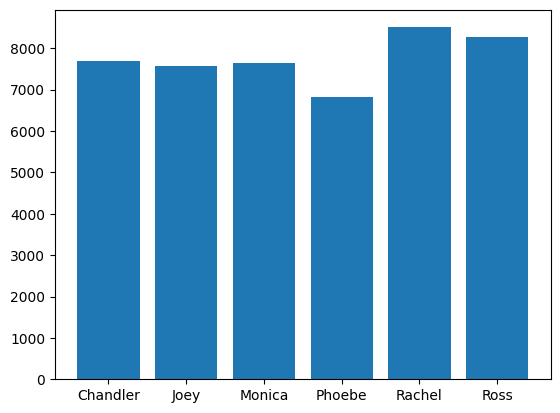

In [186]:
# your code
line_count = friends_df.groupby(["character"], as_index=False).count()
print(line_count)
plt.bar(line_count['character'], line_count['line'])

**Your answer:**
The bar plot shows that the different characters have a similiar amount of lines in the dataset.

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [187]:
# your code
characters = friends_df['character'].tolist()
lines = friends_df['line'].tolist()
print(lines[:5])

[" There's nothing to tell! He's just some guy I work with!", " C'mon  you're going out with the guy! There's gotta be something wrong with him!", ' All right Joey  be nice.  So does he have a hump? A hump and a hairpiece?', ' Wait  does he eat chalk?', " Just  'cause  I don't want her to go through what I went through with Carl- oh!"]


#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [188]:
# your code
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def my_preprocessor(line):
    tokenized = tokenizer.tokenize(line)
    filtered = [word.lower() for word in tokenized if word.lower() not in stop_list]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return ' '.join(lemmatized)

#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [189]:
# your code
corpus_p = []
for line in lines:
    line_p = my_preprocessor(line)
    corpus_p.append(line_p)

#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [190]:
# your code
X_train, X_test, y_train, y_test = train_test_split(friends_df['line'], friends_df['character'], train_size=0.8, stratify=friends_df['character'])


#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [191]:
# your code
corpus_train = X_train.tolist()
corpus_test = X_test.tolist()

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [192]:
# your code
sow = CountVectorizer(binary=True, preprocessor=my_preprocessor)
corpus_vectors = sow.fit(lines)

#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [193]:
# your code
s = lines[4]
print("Original line: ", s )
print("Line in corpus_p: ", corpus_p[4])
print("SoW Encoding: ", sow.transform([s]).toarray())

Original line:   Just  'cause  I don't want her to go through what I went through with Carl- oh!
Line in corpus_p:  cause want go went carl oh
SoW Encoding:  [[0 0 0 ... 0 0 0]]


**Your answer:**

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [194]:
# your code
sow = CountVectorizer(binary=True, preprocessor=my_preprocessor)
corpus_vectors = sow.fit_transform(corpus_train)

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [195]:
corpus_test_vectors = sow.transform(corpus_test)

In [196]:
# your code
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log_loss')
clf.fit(corpus_vectors,y_train)
prediction_train = clf.predict(corpus_vectors)
print('Train set accuracy: ', clf.score(corpus_vectors,y_train))
print('Test set accuracy:' , clf.score(corpus_test_vectors,y_test))


Train set accuracy:  0.4205208137378732
Test set accuracy: 0.290766419434591


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:** At the first sight, the accuracy rate seems to be quite low for both the training and the test set. However, it is still much higher than simple random guessing. The line count distribution in a(ii) showed that all characters have a similar amount of lines. Thus, simple random guessing would result in an accuracy of around 16.67%. With 29.25% the classifier performs better than simple random guessing.

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [197]:
# your code
line1 = lines[1]
line2 = lines[55]
sow_line1 = sow.transform([line1])
sow_line2 = sow.transform([line2])
prediciton1 = clf.predict(sow_line1)
prediciton2 = clf.predict(sow_line2)

print('The line: {} \n is from {} and is predicted to be from {}'.format(line1, characters[1], prediciton1[0]) )
print('The line: {} \n is from {} and is predicted to be from {}'.format(line2, characters[55], prediciton2[0]) )


The line:  C'mon  you're going out with the guy! There's gotta be something wrong with him! 
 is from Joey and is predicted to be from Rachel
The line:   Ooh  she should not be wearing those pants. 
 is from Chandler and is predicted to be from Phoebe


### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [198]:
# your code
import multiprocessing
cores = multiprocessing.cpu_count()

doc2vec = Doc2Vec(vector_size=10, min_count=3, workers=cores)
docs_train = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_p)]

doc2vec.build_vocab(docs_train)

doc2vec.train(corpus_iterable=docs_train, total_examples=doc2vec.corpus_count, epochs=100)

#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [199]:
# your code
some_line = corpus_p[42]

some_line_tokens = tokenizer.tokenize(some_line)
some_line_embedding = doc2vec.infer_vector(some_line_tokens)
most_similar_docs = doc2vec.dv.most_similar(some_line_embedding)
tag = most_similar_docs[0][0]

original_line = friends_df.iloc[42]['line']
original_character = friends_df.iloc[42]['character']
similar_line = friends_df.iloc[tag]['line']
similar_character = friends_df.iloc[tag]['character']  

print(original_character, ": ", original_line)
print("\n")
print(similar_character, ": ",similar_line)

Rachel :   Oh God Monica hi! Thank God! I just went to your building and you weren't there and then this guy with a big hammer said you might be here and you are  you are!


Chandler :   Because you shouldn’t be with him.  You should be with me.


**Your answer:** The lines do not belong to the same character.

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [200]:
def obtain_terms(senteces):
    corpus = []
    for sentence in senteces:
        tokenized = tokenizer.tokenize(sentence)
        filtered = [word.lower() for word in tokenized]
        corpus.append(filtered)       
    return corpus    

In [201]:
# your code
chandler_df = friends_df[friends_df['character'] == 'Chandler']
joey_df = friends_df[friends_df['character'] == 'Joey']
monica_df = friends_df[friends_df['character'] == 'Monica']
phoebe_df = friends_df[friends_df['character'] == 'Phoebe']
rachel_df = friends_df[friends_df['character'] == 'Rachel']
ross_df = friends_df[friends_df['character'] == 'Ross']

chandler_corpus = (obtain_terms(chandler_df['line'].tolist()))
joey_corpus = (obtain_terms(joey_df['line'].tolist()))
monica_corpus = (obtain_terms(monica_df['line'].tolist()))
phoebe_corpus = (obtain_terms(phoebe_df['line'].tolist()))
rachel_corpus = (obtain_terms(rachel_df['line'].tolist()))
ross_corpus = (obtain_terms(ross_df['line'].tolist()))

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [202]:
# your code
from nltk.lm import MLE
padded_tuples_chandler, vocab_chandler = padded_everygram_pipeline(3, chandler_corpus)
chandler_trigram = MLE(3)
chandler_trigram.fit(padded_tuples_chandler,vocab_chandler)

padded_tuples_joey, vocab_joey = padded_everygram_pipeline(3, joey_corpus)
joey_trigram = MLE(3)
joey_trigram.fit(padded_tuples_joey,vocab_joey)

padded_tuples_monica, vocab_monica = padded_everygram_pipeline(3, monica_corpus)
monica_trigram = MLE(3)
monica_trigram.fit(padded_tuples_monica,vocab_monica)

padded_tuples_phoebe, vocab_phoebe = padded_everygram_pipeline(3, phoebe_corpus)
phoebe_trigram = MLE(3)
phoebe_trigram.fit(padded_tuples_phoebe,vocab_phoebe)

padded_tuples_rachel, vocab_rachel = padded_everygram_pipeline(3, rachel_corpus)
rachel_trigram = MLE(3)
rachel_trigram.fit(padded_tuples_rachel,vocab_rachel)

padded_tuples_ross, vocab_ross = padded_everygram_pipeline(3, ross_corpus)
ross_trigram = MLE(3)
ross_trigram.fit(padded_tuples_ross,vocab_ross)

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [203]:
# your code
print("Chandler: ")
print(chandler_trigram.generate(10))

print("Joey: ")
print(joey_trigram.generate(10))

print("Monica: ")
print(monica_trigram.generate(10))

print("Phoebe: ")
print(phoebe_trigram.generate(10))

print("Rachel: ")
print(rachel_trigram.generate(10))

print("Ross: ")
print(ross_trigram.generate(10))

Chandler: 
['k', 'any', 'chance', 'did', 'either', 'of', 'pick', 'uh', 'rachel', 'for']
Joey: 
['tails', 'i', 'lose', 'the', 'two', 'most', 'important', 'thing', 'is', 'is']
Monica: 
['yet', 'again', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Phoebe: 
['he', 's', 'the', 'first', 'step', 'and', 'it', 's', 'just', 'us']
Rachel: 
['terrific', 'actor', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Ross: 
['s', 'dumb', 'but', 'i', 'have', 'loved', 'her', 'in', 'the', 'death']


## Question 5: Process Mining (22pts)

In [204]:
import pandas as pd
import pm4py
import numpy as np

In [205]:
from pm4py.statistics.traces.generic.log import case_statistics

In [206]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [207]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [208]:
# your code
reimburse_df = pd.read_csv("./datasets/reimburse.csv")
log = pm4py.format_dataframe(reimburse_df, activity_key="Activity", case_id='CaseId', timestamp_key='Timestamp')
print(reimburse_df.head())

                  Timestamp  CaseId              Activity  ModelTime Resource  \
0 2020-06-01 06:00:00+00:00       0                Online          0      111   
1 2020-06-01 06:16:43+00:00       1                Online       1003      111   
2 2020-06-01 08:21:49+00:00       2                   App       8509      111   
3 2020-06-01 09:19:59+00:00       0          Register Low      11999        1   
4 2020-06-01 09:26:51+00:00       0  Ask if Reimbursement      12411        1   

  Brand  case:concept:name          concept:name            time:timestamp  
0  PEAR                  0                Online 2020-06-01 06:00:00+00:00  
1    CP                  1                Online 2020-06-01 06:16:43+00:00  
2    CP                  2                   App 2020-06-01 08:21:49+00:00  
3  PEAR                  0          Register Low 2020-06-01 09:19:59+00:00  
4  PEAR                  0  Ask if Reimbursement 2020-06-01 09:26:51+00:00  


#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [209]:
# your code
num_cases = len(reimburse_df.CaseId.unique())
sorted_log = log.sort_values(by = 'Timestamp')
first = sorted_log.iloc[1]
last = sorted_log.iloc[-1]
variants = pm4py.get_variants_as_tuples(log)

print('Number of cases: ', num_cases)
print('Number of events: ', len(log))
print('Earliest Timestamp: ', first['Timestamp'])
print('Latest Timestamp:', last['Timestamp'])
print('Number of trace variants: ', len(variants))


Number of cases:  10000
Number of events:  47830
Earliest Timestamp:  2020-06-01 06:16:43+00:00
Latest Timestamp: 2022-03-10 12:14:51+00:00
Number of trace variants:  266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [210]:
# your code
from datetime import timedelta
count_total = 0
count_ressources = 0
count_cases = 0
sorted_log = log.sort_values(by='Timestamp')
delta = timedelta(microseconds=100)
for i in range(len(sorted_log)-1):
    x = sorted_log.iloc[i]
    y = sorted_log.iloc[i+1]
    if (y['Timestamp'] - x['Timestamp']) < delta :
        count_total +=1
        if y['Resource'] == x['Resource']:
            count_ressources += 1
        if y['CaseId'] == x['CaseId']:
            count_cases += 1    
print('Events occuring almost at the same time: ', count_total)
print('Ressources that complete an activity at the same time: ', count_ressources)
print('Number of cases in which two activities are executed at the same time: ', count_cases)

Events occuring almost at the same time:  688
Ressources that complete an activity at the same time:  0
Number of cases in which two activities are executed at the same time:  16


In [211]:
count_total = 0
count_ressources = 0
count_cases = 0
sorted_log_2 = log.sort_values(by='ModelTime')
for i in range(len(sorted_log)-1):
    x = sorted_log.iloc[i]
    y = sorted_log.iloc[i+1]
    if (y['ModelTime'] - x['ModelTime']) <= 0 :
        count_total +=1
        if y['Resource'] == x['Resource']:
            count_ressources += 1
        if y['CaseId'] == x['CaseId']:
            count_cases += 1    
print('Events occuring almost at the same time: ', count_total)
print('Ressources that complete an activity at the same time: ', count_ressources)
print('Number of cases in which two activities are executed at the same time: ', count_cases)

Events occuring almost at the same time:  688
Ressources that complete an activity at the same time:  0
Number of cases in which two activities are executed at the same time:  16


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

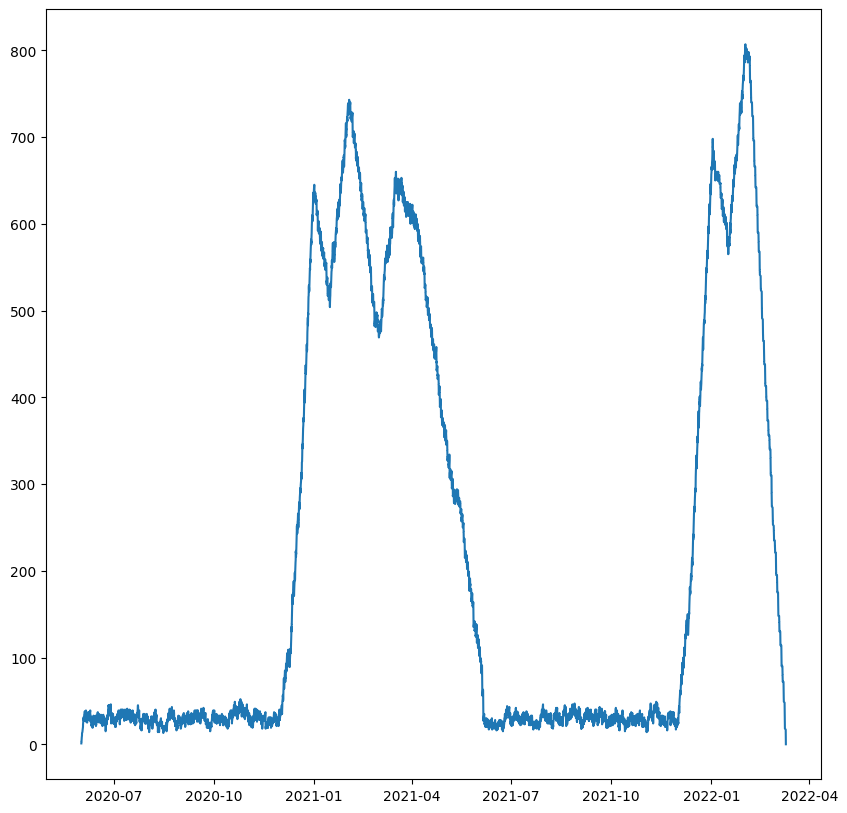

In [212]:
# your code
start_activities = pm4py.get_start_activities(log)
end_activities  = pm4py.get_end_activities(log)
log_list = sorted_log['Activity'].to_list()
count = 0
countlist = []
for i in log_list:
    if(i) in start_activities:
        count +=1
    elif (i) in end_activities:
        count -=1
    countlist.append(count)       
plt.figure(figsize=(10,10))
plt.plot(sorted_log['Timestamp'], countlist)         

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

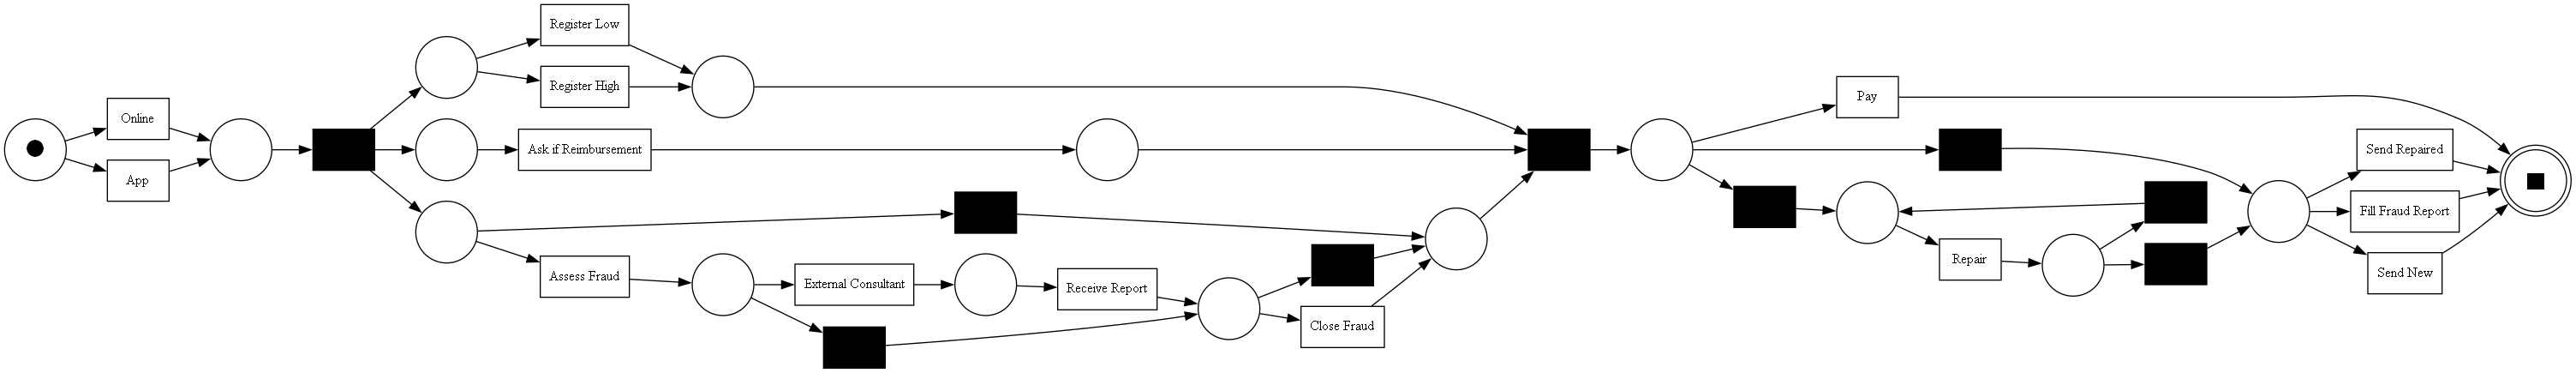

In [213]:
# your code
net, im, fm = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, im, fm, format='png') 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [214]:
# your code
token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)
scores = [x.get('trace_fitness') for x in token_replay_result]
print('fitness score: ' ,np.mean(scores))

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

fitness score:  1.0


#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [215]:
# your code
log_low = pm4py.filter_event_attribute_values(
    log, "concept:name", ['Register Low'], level='case', retain=True)
log_low['concept:name'].value_counts()
print('log_low contains {} traces'.format(log.shape[0]))


log_low contains 47830 traces


#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

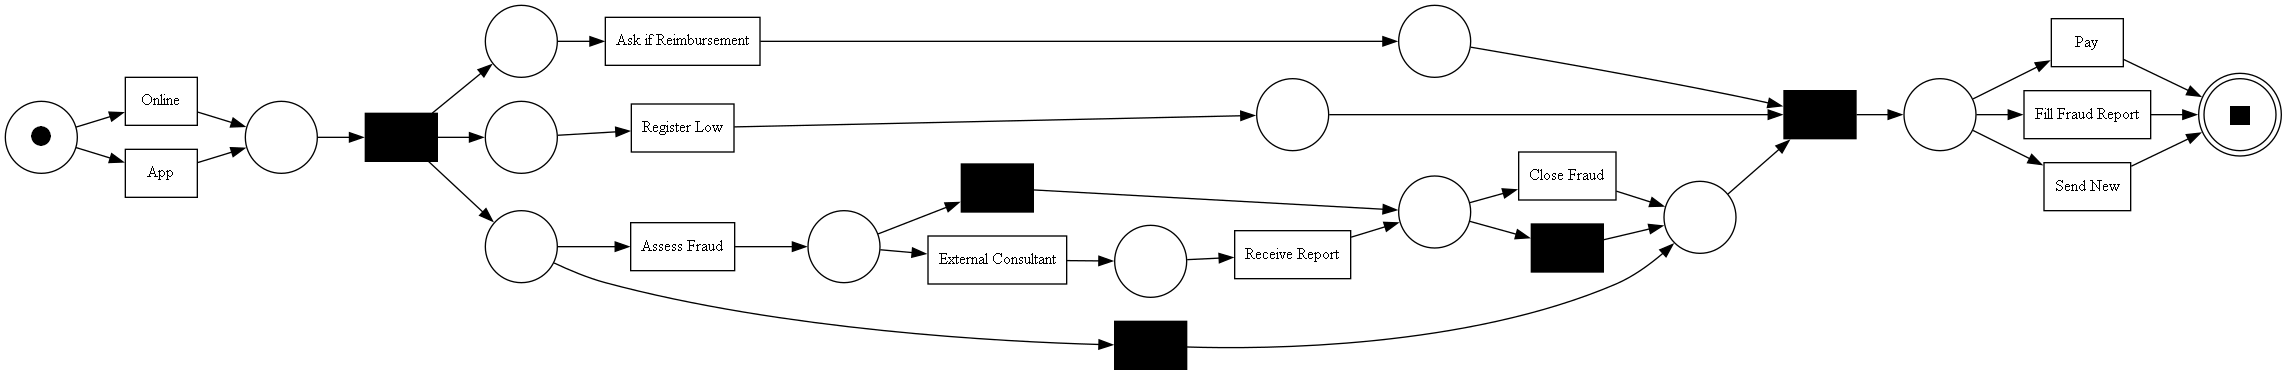

In [216]:
# your code
net, im, fm = pm4py.discover_petri_net_inductive(log_low)
pm4py.view_petri_net(net, im, fm, format='png') 

In [217]:
token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(log_low, net, im, fm)
scores = [x.get('trace_fitness') for x in token_replay_result]
print('fitness score: ', np.mean(scores))

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

fitness score:  1.0


**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)

As the second log is filtered, the corresponding model does not contain the activity 'Register High'. Furthermore, the second log/model does not contain the activity 'Repair' and therefore the model also does not contain the loop which is contained in the model corresponding to the first log.

**Your answer**: *(Relate your observations to precision here.)*

As the first model contains a loop it allows for infinitely many different traces and thus for infinitely many additional behavior that is not contained in the log. Therefore the precision score of the first model will be worse than the precision score for the second model because the second model does not contain a loop and thus allows only for a limited amount of different traces.

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

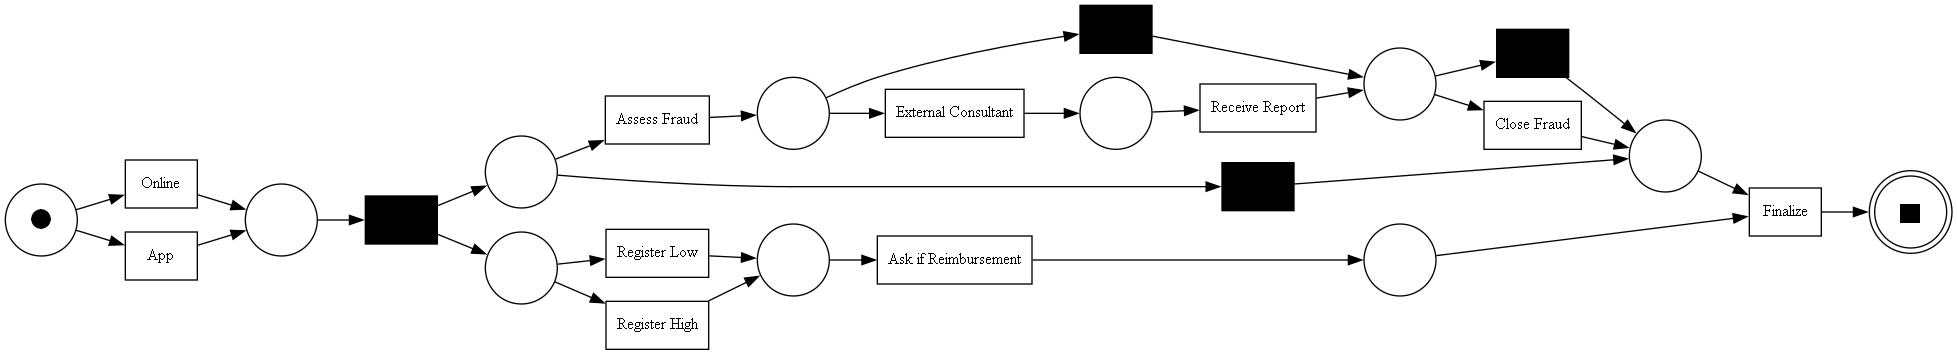

places: [ n1, n10, n11, n2, n3, n4, n5, n6, n7, n8, n9 ]
transitions: [ (n12, 'Ask if Reimbursement'), (n13, 'Assess Fraud'), (n14, 'External Consultant'), (n15, 'Receive Report'), (n16, 'Finalize'), (n17, 'Close Fraud'), (n18, 'Online'), (n19, 'Register Low'), (n20, 'App'), (n21, None), (n22, 'Register High'), (n23, None), (n24, None), (n25, None) ]
arcs: [ (n12, 'Ask if Reimbursement')->n11, (n13, 'Assess Fraud')->n9, (n14, 'External Consultant')->n3, (n15, 'Receive Report')->n4, (n16, 'Finalize')->n5, (n17, 'Close Fraud')->n10, (n18, 'Online')->n8, (n19, 'Register Low')->n1, (n20, 'App')->n8, (n21, None)->n2, (n21, None)->n7, (n22, 'Register High')->n1, (n23, None)->n10, (n24, None)->n10, (n25, None)->n4, n1->(n12, 'Ask if Reimbursement'), n10->(n16, 'Finalize'), n11->(n16, 'Finalize'), n2->(n13, 'Assess Fraud'), n2->(n23, None), n3->(n15, 'Receive Report'), n4->(n17, 'Close Fraud'), n4->(n24, None), n6->(n18, 'Online'), n6->(n20, 'App'), n7->(n19, 'Register Low'), n7->(n22, 'Regist

In [218]:
# your code
log_conf = pm4py.read_xes("./datasets/log_conf.xes")
net_conf, im_conf, fm_conf = pm4py.read_pnml("./datasets/pn_conf.apnml")
pm4py.view_petri_net(net_conf, im_conf, fm_conf, format='png')
print(net_conf)


#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [219]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(
    log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})


replaying log with TBR, completed variants ::   0%|          | 0/10000 [00:00<?, ?it/s]

In [220]:
keys = list(place_fitness.keys())
p,c,m,r = [],[],[],[]
for key in keys:
    place = place_fitness.get(key)
    p.append(place.get('p'))
    c.append(place.get('c'))
    m.append(place.get('m'))
    r.append(place.get('r'))
token_df = pd.DataFrame()    
token_df['place'] = keys
token_df['p'] = p
token_df['c'] = c
token_df['m'] = m
token_df['r'] = r

print(token_df)

   place      p      c    m    r
0     n7  10000  10000    0    0
1     n1  10000  10000  899  899
2     n4   1917   1917    0    0
3     n5  10000  10000    0    0
4     n3     99     99    0    0
5     n2  10000  10000    0    0
6     n6  10000  10000    0    0
7     n8  10000  10000    0    0
8     n9   1917   1917    0    0
9    n10  10000  10000    0    0
10   n11  10000  10000    0    0


In [106]:
non_fitting = [trace for trace in tbr_results if trace['trace_is_fit'] == False]
twp = [ trace['transitions_with_problems'] for trace in non_fitting]
twp = [ trace['transitions_with_problems'] for trace in non_fitting]
print(non_fitting[1],'\n\n',non_fitting[2],'\n\n', non_fitting[6])

{'trace_is_fit': False, 'trace_fitness': 0.875, 'activated_transitions': [(n18, 'Online'), (n12, 'Ask if Reimbursement'), (n21, None), (n19, 'Register Low'), (n23, None), (n16, 'Finalize')], 'reached_marking': ['n1:1', 'n5:1'], 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')}, 'transitions_with_problems': [(n12, 'Ask if Reimbursement')], 'missing_tokens': 1, 'consumed_tokens': 8, 'remaining_tokens': 1, 'produced_tokens': 8} 

 {'trace_is_fit': False, 'trace_fitness': 0.875, 'activated_transitions': [(n20, 'App'), (n12, 'Ask if Reimbursement'), (n21, None), (n19, 'Register Low'), (n23, None), (n16, 'Finalize')], 'reached_marking': ['n1:1', 'n5:1'], 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')}, 'transitions_with_problems': [(n12, 'Ask if Reimbursement')], 'missing_tokens': 1, 'consumed_tokens': 8, 'remaining_tokens': 1, 'produced_tokens': 8} 

 {'trace_is_fit': False, 'trace_fitness': 0.9, 'activated_transitions': [(n20, 'App'), (n12, 'Ask if Reimbur

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [221]:
# your code
non_fitting = [trace for trace in tbr_results if trace['trace_is_fit'] == False]
print(non_fitting[1],'\n\n',non_fitting[2],'\n\n', non_fitting[6])

{'trace_is_fit': False, 'trace_fitness': 0.875, 'activated_transitions': [(n18, 'Online'), (n12, 'Ask if Reimbursement'), (n21, None), (n19, 'Register Low'), (n23, None), (n16, 'Finalize')], 'reached_marking': ['n1:1', 'n5:1'], 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')}, 'transitions_with_problems': [(n12, 'Ask if Reimbursement')], 'missing_tokens': 1, 'consumed_tokens': 8, 'remaining_tokens': 1, 'produced_tokens': 8} 

 {'trace_is_fit': False, 'trace_fitness': 0.875, 'activated_transitions': [(n20, 'App'), (n12, 'Ask if Reimbursement'), (n21, None), (n19, 'Register Low'), (n23, None), (n16, 'Finalize')], 'reached_marking': ['n1:1', 'n5:1'], 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')}, 'transitions_with_problems': [(n12, 'Ask if Reimbursement')], 'missing_tokens': 1, 'consumed_tokens': 8, 'remaining_tokens': 1, 'produced_tokens': 8} 

 {'trace_is_fit': False, 'trace_fitness': 0.9, 'activated_transitions': [(n20, 'App'), (n12, 'Ask if Reimbur

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*\
In the considered unfitting traces we observe that the activity 'Ask if Reimbursement' is executed before 'Register Low' or 'Register High'. Which is not possible according to the model

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

From the calculations above we know that place n1 has a high number of missing and remaining tokens.
A closer look into the model shows that place n1 is the input place for the transition 'Ask if Reimbursement'. For every trace in which we execute 'Ask if Reimbursement' before executing "Register Low" or "Register High" the missing token count for n1 is increased. Furthermore, we get a remaining token in this place as the token that is produced by "Register Low" or "Register High" is not consumed as "Ask for Reimbursement" already was executed in beforehand.  


### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


{'PEAR': 209, 'CP': 89, 'SKP': 56}


([<matplotlib.patches.Wedge at 0x257ac8713d0>,
 [Text(-0.30820229679663647, 1.0559409757412002, 'PEAR'),
  Text(-0.23252111290911368, -1.0751436797244855, 'CP'),
  Text(0.9669314946903579, -0.5244458833624978, 'SKP')],
 [Text(-0.16811034370725622, 0.5759678049497455, '59.0%'),
  Text(-0.12682969795042562, -0.5864420071224467, '25.1%'),
  Text(0.5274171789220133, -0.28606139092499877, '15.8%')])

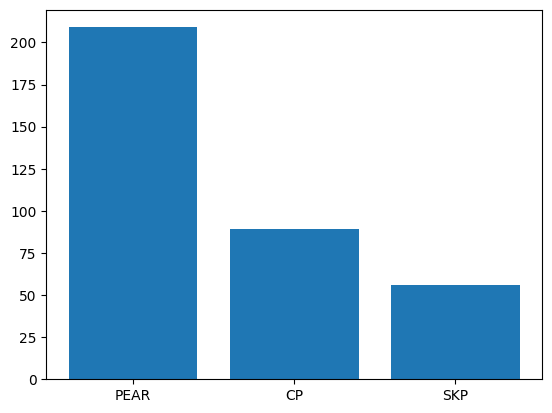

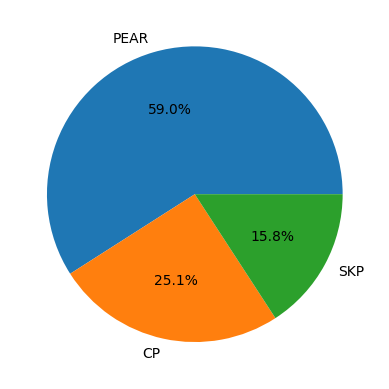

In [222]:
# your code
log_fraud  = pm4py.filter_event_attribute_values(log, "concept:name", ['Fill Fraud Report'], level = 'case', retain=True )
grouped = log_fraud.groupby("CaseId").first()

counts = grouped['Brand'].value_counts().to_dict()
print(counts)
plt.bar(*zip(*counts.items()))
plt.figure()
plt.pie(grouped['Brand'].value_counts(),autopct='%1.1f%%', labels = grouped['Brand'].value_counts().index)

**Your answer:** (*Describe the plot in two to three sentences.*)

Most of the products contained in fraud cases belong to the brand 'PEAR' with 209 cases which corresponds to a share of 59% of all fraud cases. Around 25% of the case belong to products of the brand 'CP' and the remaining 16% belong to products of the brand 'SKP'   

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


{'PEAR': 5911, 'CP': 2142, 'SKP': 1947}


([<matplotlib.patches.Wedge at 0x257b0ca2760>,
 [Text(-0.3105386927117179, 1.055256234442089, 'PEAR'),
  Text(-0.3517286488999989, -1.042250909111132, 'CP'),
  Text(0.9005603475879781, -0.6316573915915337, 'SKP')],
 [Text(-0.16938474147911886, 0.5755943096956849, '59.1%'),
  Text(-0.19185199030909028, -0.5685004958787993, '21.4%'),
  Text(0.491214735047988, -0.3445403954135638, '19.5%')])

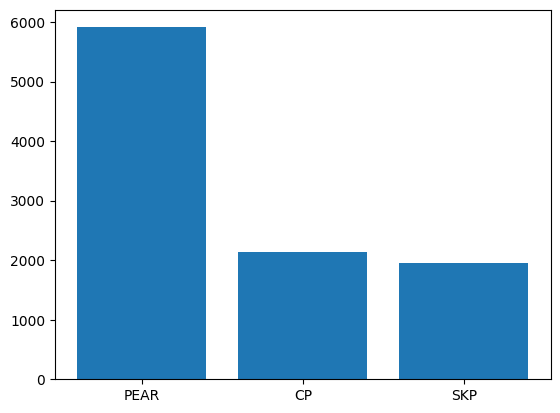

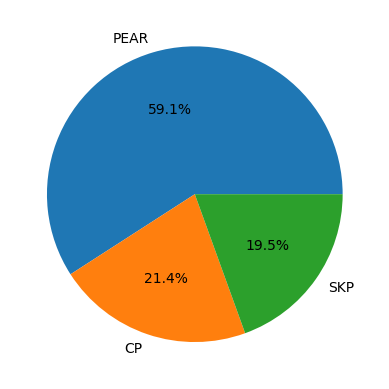

In [223]:
# your code (for a short additional analysis)
grouped_total = reimburse_df.groupby('CaseId').first()
counts_total = grouped_total['Brand'].value_counts().to_dict()
print(counts_total)
plt.bar(*zip(*counts_total.items()))

plt.figure()
plt.pie(grouped_total['Brand'].value_counts(),autopct='%1.1f%%', labels = grouped_total['Brand'].value_counts().index)

**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [224]:
# your code
data = pd.read_csv("./datasets/berkeley.csv")
data.head()

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [225]:
# your code
data.drop(columns=['Year'], inplace=True)
data.head()

,Major,Gender,Admission
0,C,F,Rejected
1,B,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected


**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [226]:
# your code
male_data = data[data['Gender'] == 'M']
female_data = data[data['Gender'] == 'F']
male_admission_count = male_data['Admission'].value_counts()
female_admission_count = female_data['Admission'].value_counts()
print('Admission rate male:', male_admission_count["Accepted"]/male_admission_count.sum())
print('Admission rate female:', female_admission_count["Accepted"]/female_admission_count.sum())

Admission rate male: 0.4427860696517413
Admission rate female: 0.3457532978477204


**Your answer:**
The admission rate for male students is 10% higher than the admission rate for female students.

**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [227]:
# your code
for major in data['Major'].unique():
    for gender in data['Gender'].unique():
        filtered_data = data[(data['Gender'] == gender) & (data['Major'] == major)]
        admission_count =  filtered_data['Admission'].value_counts()
        print('Admission rate {} {}:'.format(gender,major), admission_count["Accepted"]/admission_count.sum())



Admission rate F C: 0.33895446880269814
Admission rate M C: 0.36923076923076925
Admission rate F B: 0.68
Admission rate M B: 0.6303571428571428
Admission rate F Other: 0.37691069991954945
Admission rate M Other: 0.40952556086796615
Admission rate F F: 0.07331378299120235
Admission rate M F: 0.058981233243967826
Admission rate F A: 0.8240740740740741
Admission rate M A: 0.7249560632688928
Admission rate F D: 0.34933333333333333
Admission rate M D: 0.33093525179856115
Admission rate F E: 0.23918575063613232
Admission rate M E: 0.2774869109947644


**Your answer:**\
After grouping the students based on their major and their gender, we can see that if we fix the major that the acceptance rate for women is higher than the acceptance rate for men in most cases.

**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:** \
After grouping the students based on their major and their gender, we can see that if we fix the major that the acceptance rate for women is higher than the acceptance rate for men in most cases. This stands in contradiction to the results that the acceptance rate for all male students is higher than the acceptance rate for female students. Thus we can not confirm that there is a sex bias in the data set.

## Question 7: Big Data (15pts)

In [ ]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


**Your answer:** With the alternative formulation, we do not have to see the complete data before we can start computing the mean. If new data arrives we can simply update the old mean by combining the old mean and the new mean for the new values. Furthermore one can easily distribute the task of computing the mean onto several computing nodes by splitting the data onto the different nodes and then later combining the individual means.

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:**\
nasa_mapper1: $CaseID \times CaseEntry  \rightarrow  (Execution\times Timestamp)^*$\
With $Execution:= ExecutionID\_ActivityKey$\
nasa_reducer1: $Execution\times (Timestamp)^* \rightarrow (Duration)^*$

nasa_mapper2: $Execution \times Duration \rightarrow (ActivityKey \times Duration)^*$\
nasa_reducer2: $ActivityKey \times (Duration)^* \rightarrow (Mean)^*$

$CaseID$ defines the set of Case Ids.\
$CaseEntry$ defines the set of Case Entries.\
$Timestamp$ defines the set of Timestamps.\
$Duration$ defines the set of Durations.\
$ActivityKey$ defines the set of Activity Keys.\
$Mean$ defines the set of the means of the durations.\


#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [169]:
# your code (nasa_mapper1.py)
import sys

for line in sys.stdin:
    # remove leading and trailing whitespaces
    line = line.strip()
    # split the line into words
    words = line.split()
    key = '%s_%s' % (words[3], words[0])

    print('%s\t%s' % (key, words[1]))


In [ ]:
# your code (nasa_reducer1.py)
import sys


current_id = None
current_dur = 0
id = None

for line in sys.stdin:
    line = line.strip()
    id, timestamp = line.split('\t', 1)
    try:
        timestamp = int(timestamp)
    except ValueError:
        continue

    if current_id == id:
        current_dur = abs(current_dur-timestamp)
    else:
        if current_id:
            print('%s\t%s' % (current_id, current_dur))
        current_id = id
        current_dur = timestamp

if current_id == id:
    print('%s\t%s' % (current_id, current_dur))


In [ ]:
# your code (nasa_mapper2.py)
import sys

for line in sys.stdin:

    line = line.strip()
    key, duration = line.split('\t', 1)
    _, activity = key.split('_', 1)
    print('%s\t%s' % (activity, duration))


In [ ]:
# your code (nasa_reducer2.py)
import sys


current_id = None
duration_sum = 0
mean = 0
value_count = 0
id = None

for line in sys.stdin:
    line = line.strip()
    id, duration = line.split('\t', 1)
    try:
        duration = float(duration)
    except ValueError:
        continue

    if current_id == id:
        mean = (value_count * mean + duration) / (value_count+1)
        value_count += 1
    else:
        if current_id:
            print('%s\t%s' % (current_id, mean))
        current_id = id
        duration_sum = duration

if current_id == id:
    print('%s\t%s' % (current_id, mean))


### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [ ]:
# your matriculation number here
matr_nb = 379045

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

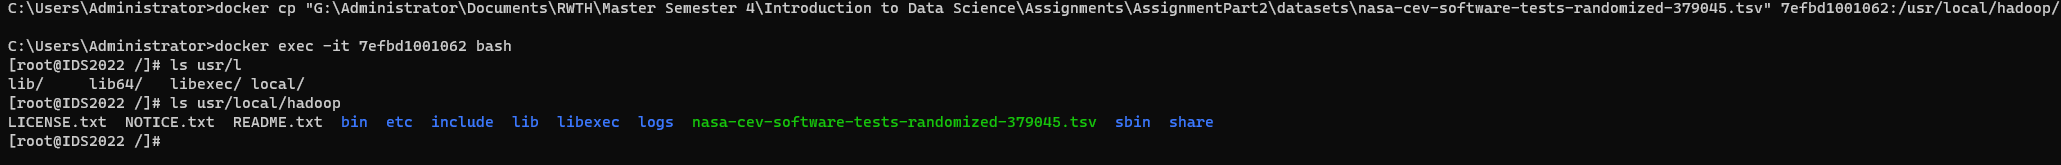

In [ ]:
from IPython.display import Image
# your code
# Image(filename='filename_screenshot_of_a1')
Image('screenshot_a1.png')

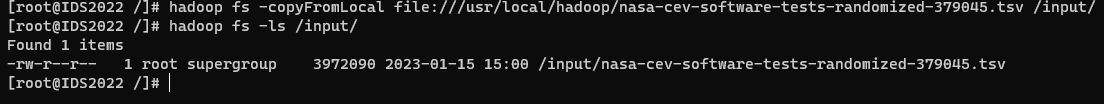

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a2')
Image('screenshot_a2.png')

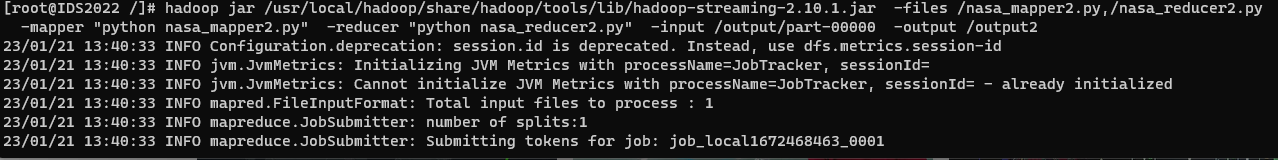

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a3')
Image('screenshot_a3_1.png')
Image('screenshot_a3_2.png')

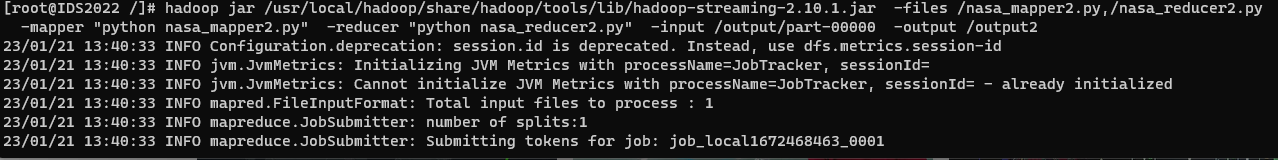

In [ ]:
Image('screenshot_a3_2.png')

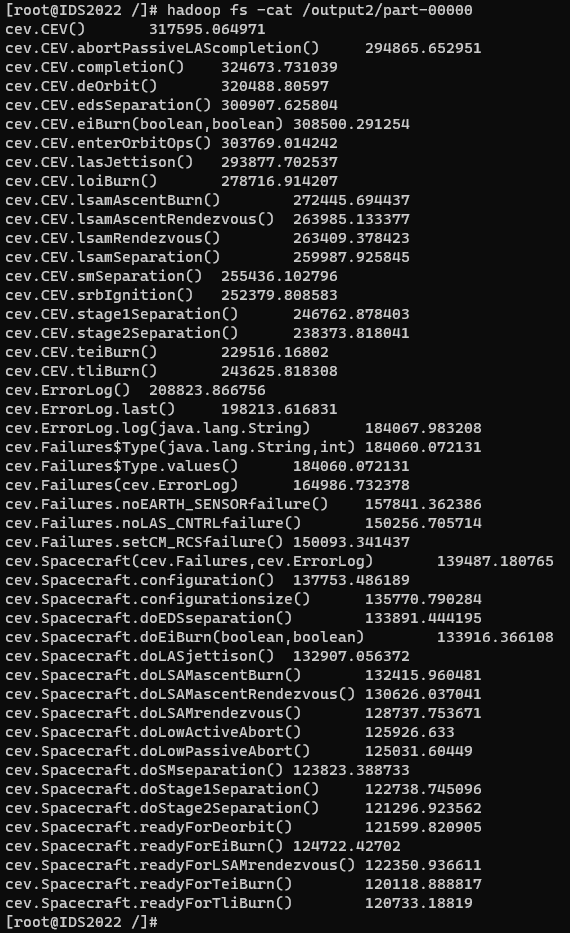

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a4')
Image('screenshot_a4.png')